In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import sys, os
src_path = os.path.abspath("src")
sys.path.insert(0, src_path)


In [ ]:
from data_preprocessing import load_mat_file, downsample_ecg
from visualization import plot_ecg_segment
from config import file_path
from heart_rate_variability_analysis import extract_nn_intervals, compute_hrv


In [6]:
#-------------------
# Data Preprocessing
#-------------------

# segmnet the data into 'day' and 'sleep' segments from the .mat file
day_data, sleep_data = load_mat_file(file_path)

In [7]:
# Downsample both segments from 250 Hz to 100 Hz.
day_data_downsampled = downsample_ecg(day_data, original_rate=250, target_rate=100)
sleep_data_downsampled = downsample_ecg(sleep_data, original_rate=250, target_rate=100)

In [8]:
#  Print smple counts for verification.
print(f"Day segment: Original samples = {len(day_data)}, Downsampled samples = {len(day_data_downsampled)}")
print(f"Sleep segment: Original samples = {len(sleep_data)}, Downsampled samples = {len(sleep_data_downsampled)}")

Day segment: Original samples = 15108096, Downsampled samples = 6043238
Sleep segment: Original samples = 6600000, Downsampled samples = 2640000


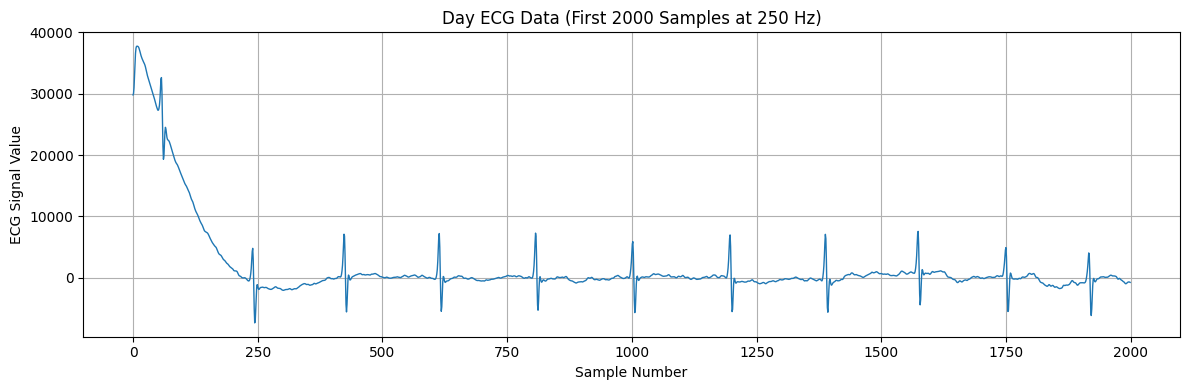

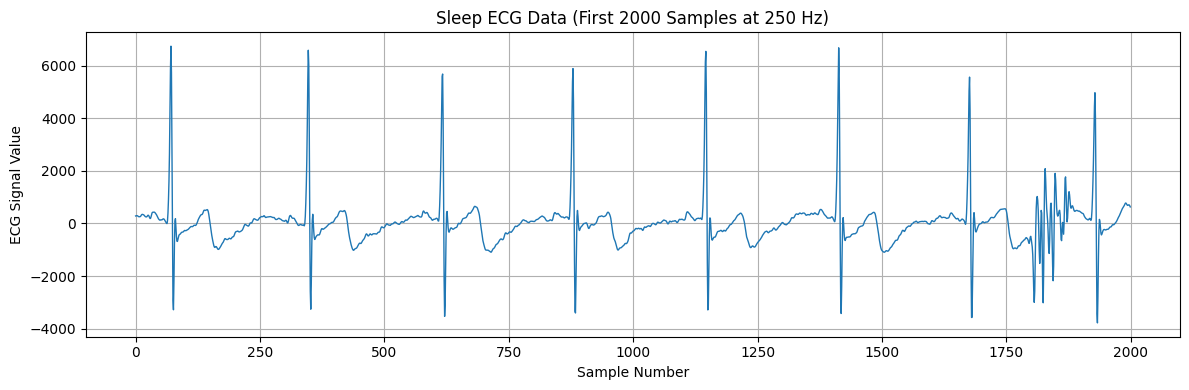

In [9]:
#---------------
# Visualization
#---------------

# Plotting the first 2000 samples of the original for both segments.
plot_ecg_segment(day_data, 250, num_samples=2000, label='Day')
plot_ecg_segment(sleep_data, 250, num_samples=2000, label='Sleep')

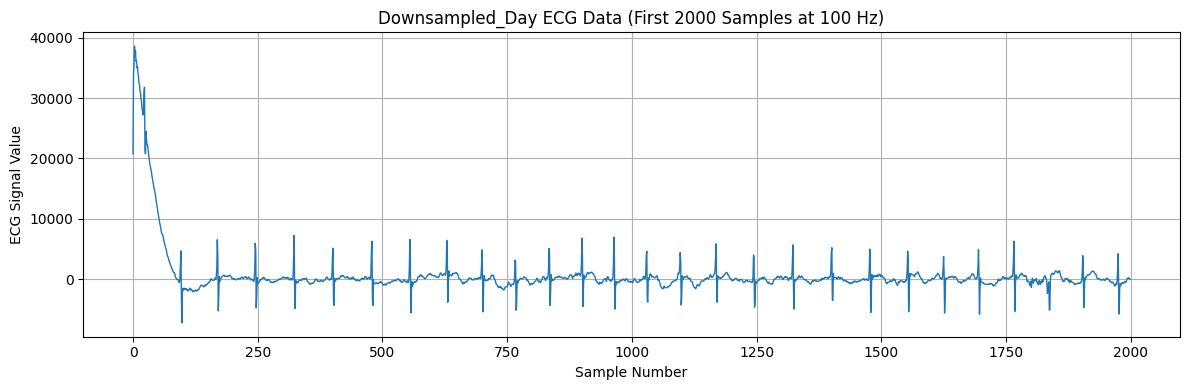

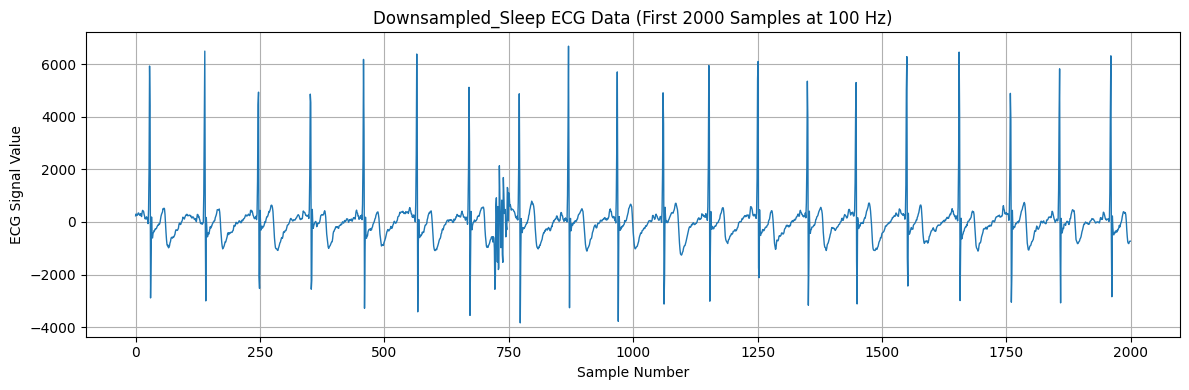

In [10]:
# Plotting the first 2000 samples of the downsampled for both segments.
plot_ecg_segment(day_data_downsampled, 100, num_samples=2000, label='Downsampled_Day')
plot_ecg_segment(sleep_data_downsampled, 100, num_samples=2000, label='Downsampled_Sleep')

In [36]:
#---------------------------
# Heart Variability Analysis
#---------------------------

#R-peak detection 
nn_day= extract_nn_intervals(day_data_downsampled,   sampling_rate=100)
nn_night= extract_nn_intervals(sleep_data_downsampled, sampling_rate=100)

In [37]:
#compute HRV metrics
sdnn_day,   rmssd_day   = compute_hrv(nn_day)
sdnn_night, rmssd_night = compute_hrv(nn_night)

In [41]:
print("\nHRV Metrics:")
print(f"Day    - SDNN: {sdnn_day:.2f} ms | RMSSD: {rmssd_day:.2f} ms")
print(f"Night  - SDNN: {sdnn_night:.2f} ms | RMSSD: {rmssd_night:.2f} ms")



HRV Metrics:
Day    - SDNN: 131.99 ms | RMSSD: 68.23 ms
Night  - SDNN: 114.90 ms | RMSSD: 72.80 ms


In [45]:
# Print the results
results = pd.DataFrame({
    "SDNN_ms": [sdnn_day, sdnn_night],
    "RMSSD_ms": [rmssd_day, rmssd_night]
}, index=["Day", "Night"])

print("\nHRV Metrics:")
print(results)


HRV Metrics:
          SDNN_ms   RMSSD_ms
Day    131.985173  68.230331
Night  114.899091  72.801420


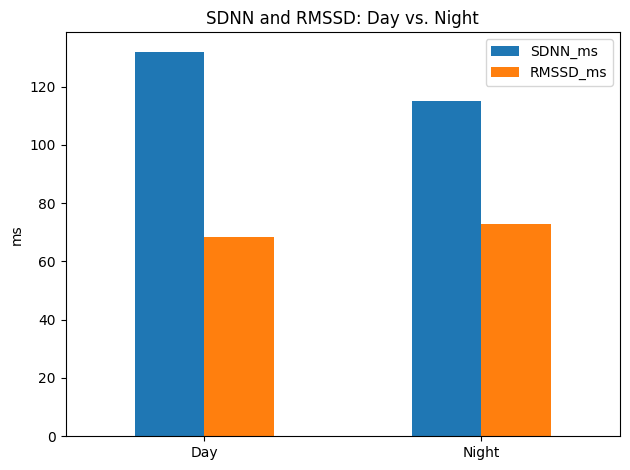

In [46]:

#plot comparison of HRV metrics
results.plot.bar(rot=0)
plt.ylabel("ms")
plt.title("SDNN and RMSSD: Day vs. Night")
plt.tight_layout()
plt.show()
